## Find a list of movies

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://www.themoviedb.org/list/4309')

In [2]:
bsObj = BeautifulSoup(html)

In [3]:
bsObj.prettify()

'<!DOCTYPE html>\n<html class="no-js" lang="en">\n <head>\n  <title>\n   The Studio Ghibli Collection — The Movie Database (TMDb)\n  </title>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="on" http-equiv="cleartype"/>\n  <meta charset="utf-8"/>\n  <meta content="#00d573" name="msapplication-TileColor"/>\n  <meta content="https://www.themoviedb.org/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71c69222b72c2f75d26dab1224173a96fecc962.png" name="msapplication-TileImage"/>\n  <meta content="Movies, TV Shows, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast" name="keywords"/>\n  <meta content="yes" name="mobile-web-app-capable"/>\n  <meta content="yes" name="apple-mobile-web-app-capable"/>\n  <meta content="True" name="HandheldFriendly"/>\n  <meta content="320" name="MobileOptimized"/>\n  <meta content="width=1120" name="viewport"/>\n  <meta content="#071d25" name="theme-color"/>\n  <link href="/apple-

Pay attention that the list of the movies are wrapped in unordered list <ul> tag with id = "list_page_1". Let's extract movies with findAll(tag, attribute). Then retrieve a list of all <li> tags within <ul> tag 

In [4]:
movies = bsObj.find('ul', id = "list_page_1")
movies = movies.find_all('li')
len(movies)
for movie in movies:
    print(movie, len(movie), "\n\n")

<li class="" id="4bc88b44017a3c122d001496">
<div class="item_wrapper">
<div class="info_wrapper">
<div class="image">
<a href="/movie/81">
<img alt="Nausicaä of the Valley of the Wind" class="poster lazyload fade" data-sizes="auto" data-src="https://image.tmdb.org/t/p/w185_and_h278_bestv2/hnYowHwLq0iUWriAHtiiCWsI2dP.jpg" data-srcset="https://image.tmdb.org/t/p/w185_and_h278_bestv2/hnYowHwLq0iUWriAHtiiCWsI2dP.jpg 1x, https://image.tmdb.org/t/p/w370_and_h556_bestv2/hnYowHwLq0iUWriAHtiiCWsI2dP.jpg 2x"/>
</a>
</div>
<div class="info_strip">
<div class="number">
<span>1</span>
</div>
<div class="meta buttons">
<a class="favourite no_click" href="#" title="Login to add this movie to your favorite list">
<span class="glyphicons glyphicons-heart favourite list_action" data-media-type="movie" id="favourite_4bc88b44017a3c122d001496"></span>
</a>
<a class="watchlist no_click" href="#" title="Login to add this movie to your watchlist">
<span class="glyphicons glyphicons-bookmark watchlist list_act

The function find_all() returns a list of objects with tag specified in the parenthesis. From analyzing the length of each item in the list, we know that the length of the movie item is 3. Thus, the items with length > 0 would give us the information about the movies

In [5]:
movies = [movie for movie in movies if len(movie) > 0]

## Extract information from the first movie

First try to extract information from the first movie in the movie list such as title, url, image, rank, and rating

In [6]:
movie_1 = movies[0]
movie_1.img.attrs

{'class': ['poster', 'lazyload', 'fade'],
 'data-sizes': 'auto',
 'data-src': 'https://image.tmdb.org/t/p/w185_and_h278_bestv2/hnYowHwLq0iUWriAHtiiCWsI2dP.jpg',
 'data-srcset': 'https://image.tmdb.org/t/p/w185_and_h278_bestv2/hnYowHwLq0iUWriAHtiiCWsI2dP.jpg 1x, https://image.tmdb.org/t/p/w370_and_h556_bestv2/hnYowHwLq0iUWriAHtiiCWsI2dP.jpg 2x',
 'alt': 'Nausicaä of the Valley of the Wind'}

In [7]:
#Title
movie_1.img.attrs['alt']

'Nausicaä of the Valley of the Wind'

In [8]:
#Find the link to movie's image
#Use Image to display the image to make sure the link is working properly
from IPython.display import Image
image_url = movie_1.find('img').attrs['data-src']
Image(url= image_url)

In [9]:
#Extract url by accessing to <a> tag then to its attribute href
a = movie_1.a.attrs
a

{'href': '/movie/81'}

In [10]:
#Extract the value to get the url link
for value in a.values():
    url = value
print(url)

/movie/81


The link to the movie is "https://www.themoviedb.org/movie/81". Thus, we contenate the string "https://www.themoviedb.org" with "/movie/81" to get the url of the first movie

In [11]:
full_url = "https://www.themoviedb.org" + url
print(full_url)

https://www.themoviedb.org/movie/81


Find rank by accessing div tag with class='number'
Then access the span tag
.text returns the text inside the tag

In [12]:
#rank
int(movie_1.find('div', {'class':'number'}).span.text)

1

Perform the same steps to find rating

In [13]:
#Rating
float(movie_1.find_all('span',{'class':'rating'})[1].text)


7.9

## Iterate through all the movies

It is time to apply the methods we use for extracting the information from the first movie to extract all the movies


In [14]:
#Create 4 lists that contains all the url, movie's name, rank, and rating
urls = []
names = []
ranks = []
ratings = []
images = []

for movie in movies:
    for value in movie.a.attrs.values():
        url = value
    urls.append("https://www.themoviedb.org" +url)
    
    names.append(movie.img.attrs['alt'])
    
    ranks.append(int(movie.find('div', {'class':'number'}).span.text))
    
    ratings.append(float(movie.find_all('span',{'class':'rating'})[1].text))
    
    images.append(movie.find('img').attrs['data-src'])


# Web scrap multiple webpages

Loop through each page to find summary, director, year, run time, budget, revenue, genres, keywords

Try with the first link

In [15]:
url = urlopen("https://www.themoviedb.org/movie/81")
soup = BeautifulSoup(url)


In [16]:
#find summary
soup.find('div', {'class':'overview'}).p.get_text()

'After a global war, the seaside kingdom known as the Valley of the Wind remains one of the last strongholds on Earth untouched by a poisonous jungle and the powerful insects that guard it. Led by the courageous Princess Nausicaä, the people of the Valley engage in an epic struggle to restore the bond between humanity and Earth.'

In [17]:
#find director
soup.find('li', {'class':'profile'}).a.get_text()

'Hayao Miyazaki'

In [18]:
#Find language, runtime, budget, revenue, and genre
inf = soup.find('ul', {'class':'releases'}).find_next_siblings()
language = inf[0].text
runtime = inf[1].text
budget = inf[2].text
rev = inf[3].text    

In [19]:
#Find Genre
section = soup.find('section',{'class':'genres right_column'})
[li.text for li in section.find_all('li')]

['Adventure', 'Animation', 'Fantasy']

Scrap every page

In [20]:
summaries = []
languages = []
runtimes = []
budgets = []
revenues = []
genres = []
directors = []
for url in urls:
    soup = BeautifulSoup(urlopen(url))
    
    summaries.append(soup.find('div', {'class':'overview'}).p.get_text())
    
    inf = soup.find('ul', {'class':'releases'}).find_next_siblings()
    
    languages.append(inf[0].text)
    
    runtimes.append(inf[1].text)
    
    budgets.append(inf[2].text)
    
    revenues.append(inf[3].text)
    
    directors.append(soup.find('li', {'class':'profile'}).a.get_text())
    
    section = soup.find('section',{'class':'genres right_column'})
    genres.append([li.text for li in section.find_all('li')])

# Pandas DataFrame

In [21]:
import pandas as pd

In [22]:
ghibli = pd.DataFrame(list(zip(names, ranks, ratings, languages, runtimes, budgets, revenues, genres, summaries)),
             columns=['name','rank','rating','language','runtime', 'budget','revenue','genre','summary'])
ghibli

,name,rank,rating,language,runtime,budget,revenue,genre,summary
0,Nausicaä of the Valley of the Wind,1,7.9,Original Language Japanese,Runtime 1h 57m,"Budget $1,000,000.00","Revenue $3,301,446.00","[Adventure, Animation, Fantasy]","After a global war, the seaside kingdom known ..."
1,The Cat Returns,2,7.2,Original Language Japanese,Runtime 1h 15m,Budget -,"Revenue $522,911.00","[Adventure, Fantasy, Animation, Drama, Family]","Haru, a schoolgirl bored by her ordinary routi..."
2,Porco Rosso,3,7.8,Original Language Japanese,Runtime 1h 34m,Budget -,Revenue -,"[Comedy, Animation, Adventure]","Porco Rosso, known in Japan as Crimson Pig (Ku..."
3,Pom Poko,4,7.2,Original Language Japanese,Runtime 1h 59m,Budget -,Revenue -,"[Adventure, Animation, Fantasy]",The Raccoons of the Tama Hills are being force...
4,Kiki's Delivery Service,5,7.8,Original Language Japanese,Runtime 1h 43m,"Budget $6,900,000.00","Revenue $18,172,849.00","[Animation, Adventure, Drama, Fantasy, Family]","A young witch, on her mandatory year of indepe..."
5,Castle in the Sky,6,8.0,Original Language Japanese,Runtime 2h 4m,Budget -,Revenue -,"[Adventure, Fantasy, Animation, Action, Family...",A young boy and a girl with a magic crystal mu...
6,Howl's Moving Castle,7,8.4,Original Language Japanese,Runtime 1h 59m,"Budget $24,000,000.00","Revenue $236,049,757.00","[Fantasy, Animation, Adventure]","When Sophie, a shy young woman, is cursed with..."
7,Princess Mononoke,8,8.4,Original Language Japanese,Runtime 2h 14m,"Budget $26,500,000.00","Revenue $159,375,308.00","[Adventure, Fantasy, Animation]","Ashitaka, a prince of the disappearing Emishi ..."
8,My Neighbor Totoro,9,8.1,Original Language Japanese,Runtime 1h 26m,Budget -,Revenue -,"[Fantasy, Animation, Family]",Two sisters move to the country with their fat...
9,Grave of the Fireflies,10,8.4,Original Language Japanese,Runtime 1h 29m,"Budget $3,700,000.00",Revenue -,"[Animation, Drama, War]","In the final months of World War II, 14-year-o..."


# Convert string into numerical values

In [23]:
import re
import numpy as np
def processNum(num):
    if len(num) >1:
        return float(re.sub(r'[^\w\s.]','',num))
    else:
        return np.NaN
    
for budget in ghibli.budget:
    print(processNum(budget.split()[1]))

1000000.0
nan
nan
nan
6900000.0
nan
24000000.0
26500000.0
nan
3700000.0
nan
nan
19000000.0
nan
22000000.0
nan
41677699.0
23000000.0
22000000.0
30000000.0


In [24]:
budgets = ghibli.budget

In [25]:
budgets

0      Budget $1,000,000.00
1                  Budget -
2                  Budget -
3                  Budget -
4      Budget $6,900,000.00
5                  Budget -
6     Budget $24,000,000.00
7     Budget $26,500,000.00
8                  Budget -
9      Budget $3,700,000.00
10                 Budget -
11                 Budget -
12    Budget $19,000,000.00
13                 Budget -
14    Budget $22,000,000.00
15                 Budget -
16    Budget $41,677,699.00
17    Budget $23,000,000.00
18    Budget $22,000,000.00
19    Budget $30,000,000.00
Name: budget, dtype: object

In [26]:
processNum(budgets[0].split()[1])

1000000.0

In [27]:
ghibli['budget'] = ghibli['budget'].map(lambda x: processNum(x.split()[1]))

In [28]:
ghibli['revenue'] = ghibli['revenue'].map(lambda x: processNum(x.split()[1]))

# Process Null Values

In [29]:
#Feed previous values to the missing values
ghibli.fillna(method='ffill',inplace=True)

In [30]:
ghibli.isnull().sum()

name        0
rank        0
rating      0
language    0
runtime     0
budget      0
revenue     0
genre       0
summary     0
dtype: int64

In [31]:
import matplotlib.pyplot as plt
plt.plot(ghibli['budget'])

# Transform Categorical Variables

In [32]:
#Create unique variables
genre = sorted(set(y for x in ghibli.genre for y in x))
genre


['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Drama',
 'Family',
 'Fantasy',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'War']

In [33]:
#Start with creating DataFrame of all zeros
dummies = pd.DataFrame(np.zeros((len(ghibli), len(genre))), columns=genre)

In [34]:
#itereate through each movie and set entries in each row of dummies to 1
for i, gen in enumerate(ghibli.genre):
    dummies.ix[i, gen] = 1

/Users/khuyentran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
dummies

,Action,Adventure,Animation,Comedy,Drama,Family,Fantasy,Romance,Science Fiction,TV Movie,War
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
#Combine this data frame with ghibli
ghibli = ghibli.join(dummies.add_prefix('Genre_'))

In [37]:
ghibli.drop(axis=1, columns = ['genre'], inplace=True)

In [38]:
ghibli.runtime[0].split()[1:]

['1h', '57m']

In [39]:
pd.to_datetime('1h 57m',format='%Ih %Mm').time()

datetime.time(1, 57)

In [40]:
def processTime(time):
    time = ' '.join(time.split()[1:])
    return pd.to_datetime(time, format='%Ih %Mm').time()

In [41]:
processTime(ghibli.runtime[0])

datetime.time(1, 57)

In [42]:
ghibli.runtime = ghibli.runtime.map(lambda x: processTime(x))

# Text mining

In [43]:
summary = ghibli.summary

In [44]:
text = summary[0]

In [45]:
import nltk
#Import string for list of punctuation
import string
#Import the stop word list
from nltk.corpus import stopwords
#Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer
#Import stemmer
from nltk.stem.porter import PorterStemmer


In [46]:
#remove punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
def remove_punctuation(text):
  no_punct = ''.join([c for c in text if c not in string.punctuation])
  return no_punct
    

In [48]:
remove_punctuation(text)

'After a global war the seaside kingdom known as the Valley of the Wind remains one of the last strongholds on Earth untouched by a poisonous jungle and the powerful insects that guard it Led by the courageous Princess Nausicaä the people of the Valley engage in an epic struggle to restore the bond between humanity and Earth'

In [49]:
ghibli.summary = ghibli.summary.apply(lambda x: remove_punctuation(x))

In [50]:
#tokenize
tokenizer = RegexpTokenizer(r'\w+')

ghibli.summary = ghibli.summary.apply(lambda x: tokenizer.tokenize(x.lower()))

In [51]:
#remove stop words
from nltk.corpus import stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

ghibli.summary = ghibli.summary.apply(lambda x: remove_stopwords(x))

In [52]:
# lemmatizing

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

ghibli.summary.apply(lambda x: word_lemmatizer(x))[0]

['global',
 'war',
 'seaside',
 'kingdom',
 'known',
 'valley',
 'wind',
 'remains',
 'one',
 'last',
 'stronghold',
 'earth',
 'untouched',
 'poisonous',
 'jungle',
 'powerful',
 'insect',
 'guard',
 'led',
 'courageous',
 'princess',
 'nausicaä',
 'people',
 'valley',
 'engage',
 'epic',
 'struggle',
 'restore',
 'bond',
 'humanity',
 'earth']

In [53]:
#Compare with Stemmer
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = [stemmer.stem(i) for i in text]
    return stem_text

ghibli.summary.apply(lambda x: word_stemmer(x))[0]

['global',
 'war',
 'seasid',
 'kingdom',
 'known',
 'valley',
 'wind',
 'remain',
 'one',
 'last',
 'stronghold',
 'earth',
 'untouch',
 'poison',
 'jungl',
 'power',
 'insect',
 'guard',
 'led',
 'courag',
 'princess',
 'nausicaä',
 'peopl',
 'valley',
 'engag',
 'epic',
 'struggl',
 'restor',
 'bond',
 'human',
 'earth']

In [54]:
ghibli

,name,rank,rating,language,runtime,budget,revenue,summary,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_War
0,Nausicaä of the Valley of the Wind,1,7.9,Original Language Japanese,01:57:00,1000000.0,3301446.0,"[global, war, seaside, kingdom, known, valley,...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,The Cat Returns,2,7.2,Original Language Japanese,01:15:00,1000000.0,522911.0,"[haru, schoolgirl, bored, ordinary, routine, s...",0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Porco Rosso,3,7.8,Original Language Japanese,01:34:00,1000000.0,522911.0,"[porco, rosso, known, japan, crimson, pig, kur...",0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Pom Poko,4,7.2,Original Language Japanese,01:59:00,1000000.0,522911.0,"[raccoons, tama, hills, forced, homes, rapid, ...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Kiki's Delivery Service,5,7.8,Original Language Japanese,01:43:00,6900000.0,18172849.0,"[young, witch, mandatory, year, independent, l...",0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5,Castle in the Sky,6,8.0,Original Language Japanese,02:04:00,6900000.0,18172849.0,"[young, boy, girl, magic, crystal, must, race,...",1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
6,Howl's Moving Castle,7,8.4,Original Language Japanese,01:59:00,24000000.0,236049757.0,"[sophie, shy, young, woman, cursed, old, body,...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Princess Mononoke,8,8.4,Original Language Japanese,02:14:00,26500000.0,159375308.0,"[ashitaka, prince, disappearing, emishi, peopl...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,My Neighbor Totoro,9,8.1,Original Language Japanese,01:26:00,26500000.0,159375308.0,"[two, sisters, move, country, father, order, c...",0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,Grave of the Fireflies,10,8.4,Original Language Japanese,01:29:00,3700000.0,159375308.0,"[final, months, world, war, ii, 14yearold, sei...",0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Visualize the data

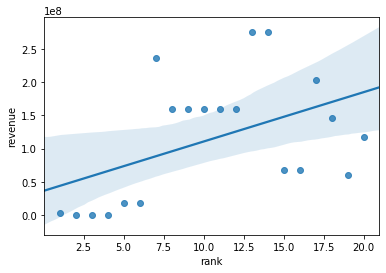

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot('rank', 'revenue', data = ghibli)